In [1]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [2]:
os.listdir("Downloads/imags_data")

['dataset-master', 'dataset2-master']

In [3]:
list(os.walk("Downloads/imags_data"))

[('Downloads/imags_data', ['dataset-master', 'dataset2-master'], []),
 ('Downloads/imags_data\\dataset-master', ['dataset-master'], []),
 ('Downloads/imags_data\\dataset-master\\dataset-master',
  ['Annotations', 'JPEGImages'],
  ['labels.csv']),
 ('Downloads/imags_data\\dataset-master\\dataset-master\\Annotations',
  [],
  ['BloodImage_00000.xml',
   'BloodImage_00001.xml',
   'BloodImage_00002.xml',
   'BloodImage_00003.xml',
   'BloodImage_00004.xml',
   'BloodImage_00005.xml',
   'BloodImage_00006.xml',
   'BloodImage_00007.xml',
   'BloodImage_00008.xml',
   'BloodImage_00009.xml',
   'BloodImage_00010.xml',
   'BloodImage_00011.xml',
   'BloodImage_00012.xml',
   'BloodImage_00013.xml',
   'BloodImage_00014.xml',
   'BloodImage_00015.xml',
   'BloodImage_00016.xml',
   'BloodImage_00017.xml',
   'BloodImage_00018.xml',
   'BloodImage_00019.xml',
   'BloodImage_00020.xml',
   'BloodImage_00021.xml',
   'BloodImage_00022.xml',
   'BloodImage_00023.xml',
   'BloodImage_00024.xml',
 

In [4]:
for root,branch,leaves in os.walk("Downloads/imags_data"):
    for files in leaves:
        print(os.path.join(root,files))

Downloads/imags_data\dataset-master\dataset-master\labels.csv
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00000.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00001.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00002.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00003.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00004.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00005.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00006.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00007.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00008.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00009.xml
Downloads/imags_data\dataset-master\dataset-master\Annotations\BloodImage_00010.xml
Downloads/imag

In [5]:
for root,branch,leaves in os.walk("Downloads/imags_data"):
    for files in leaves:
        if files.endswith(".csv"):
            print(os.path.join(root,files))

Downloads/imags_data\dataset-master\dataset-master\labels.csv
Downloads/imags_data\dataset2-master\dataset2-master\labels.csv


In [6]:
import pandas as pd
df_label_1 = pd.read_csv("Downloads/imags_data\dataset-master\dataset-master\labels.csv")
df_label_2 = pd.read_csv("Downloads/imags_data\dataset2-master\dataset2-master\labels.csv")

In [7]:
df_label_1

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL
...,...,...,...
406,NaN,406,NaN
407,NaN,407,NEUTROPHIL
408,NaN,408,NEUTROPHIL
409,NaN,409,NEUTROPHIL


In [8]:
df_label_2

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL
...,...,...,...
406,NaN,406,NaN
407,NaN,407,NEUTROPHIL
408,NaN,408,NEUTROPHIL
409,NaN,409,NEUTROPHIL


In [9]:
import keras
import keras_preprocessing
import tensorflow
import numpy as np

In [10]:
def directory_loop(dir):
    file_list = []
    for root,branch,leaves in os.walk(dir):
        for file in leaves:
            img_path = os.path.join(root,file)
            file_list.append(img_path)
    return file_list

In [11]:
train_file = directory_loop("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/")

In [12]:
test_file = directory_loop("Downloads/imags_data/dataset2-master/dataset2-master/images/TEST/")

# Reading Each Image and Displaying the Image

In [13]:
from PIL import Image

In [14]:
from keras_preprocessing import image
from skimage.io import collection

In [15]:
help(collection.ImageCollection)

Help on class ImageCollection in module skimage.io.collection:

class ImageCollection(builtins.object)
 |  ImageCollection(load_pattern, conserve_memory=True, load_func=None, **load_func_kwargs)
 |  
 |  Load and manage a collection of image files.
 |  
 |  Parameters
 |  ----------
 |  load_pattern : str or list of str
 |      Pattern string or list of strings to load. The filename path can be
 |      absolute or relative.
 |  conserve_memory : bool, optional
 |      If True, `ImageCollection` does not keep more than one in memory at a
 |      specific time. Otherwise, images will be cached once they are loaded.
 |  
 |  Other parameters
 |  ----------------
 |  load_func : callable
 |      ``imread`` by default. See notes below.
 |  
 |  Attributes
 |  ----------
 |  files : list of str
 |      If a pattern string is given for `load_pattern`, this attribute
 |      stores the expanded file list. Otherwise, this is equal to
 |      `load_pattern`.
 |  
 |  Notes
 |  -----
 |  Note tha

In [16]:
train_image = collection.ImageCollection(train_file,load_func = None)
train_image

In [17]:
train_image[0].shape

(240, 320, 3)

In [18]:
type(train_image)

skimage.io.collection.ImageCollection

In [19]:
test_image = collection.ImageCollection(test_file)
test_image

In [20]:
len(train_image)

9957

In [21]:
len(train_image.files)

9957

In [22]:
len(test_image.files)

2487

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

In [25]:
for images in train_image.files:
    print(images)

Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_207.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_651.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_797.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_991.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_1169.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_1414.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_2142.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_2370.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_3072.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_4431.jpeg
Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL\_0_4480.jpeg
Downloads/imag

In [26]:
def class_label_finder(path):
    import re
    labels = []
    for root,sub,files in os.walk(path):
           if re.search("images*",root):
               labels.append(sub)

    image_folders = labels[:2]
    image_folders

    final_class_labels = []
    for i in image_folders[0]:
        final_class_labels.append((i,image_folders[1]))
    return dict(final_class_labels)

In [27]:
d = class_label_finder("Downloads/imags_data")
d

{'TEST': ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
 'TEST_SIMPLE': ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
 'TRAIN': ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']}

In [28]:
from glob import glob
eosinophil_test = glob("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL" + "/*.jpeg")[0]
lymphocyte_test = glob("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE" + "/*.jpeg")[0]
monocyte_test = glob("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE" + "/*.jpeg")[0]
neutrophil_test = glob("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL" + "/*.jpeg")[0]

In [29]:
folders =glob("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/*")


In [30]:
folders

['Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN\\EOSINOPHIL',
 'Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN\\LYMPHOCYTE',
 'Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN\\MONOCYTE',
 'Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN\\NEUTROPHIL']

Text(0.5, 1.0, 'NEUTROPHIL_TRAIN')

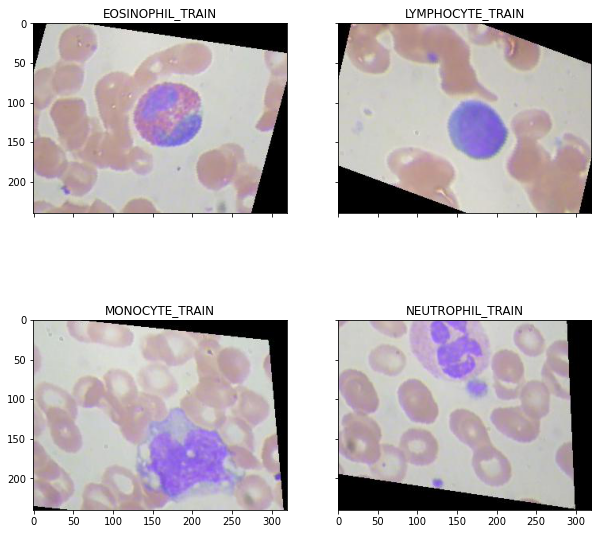

In [31]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize = (10,10))
ax1.imshow(plt.imread(eosinophil_test))
ax2.imshow(plt.imread(lymphocyte_test))
ax3.imshow(plt.imread(monocyte_test))
ax4.imshow(plt.imread(neutrophil_test))
ax1.set_title("EOSINOPHIL_TRAIN")
ax2.set_title("LYMPHOCYTE_TRAIN")
ax3.set_title("MONOCYTE_TRAIN")
ax4.set_title("NEUTROPHIL_TRAIN")

# Conversion of images into Bulk Tensors



In [32]:
from torchvision import transforms
from torchvision import datasets

In [33]:
training_data = transforms.Compose([transforms.RandomRotation(20),transforms.RandomAdjustSharpness(0,p = 0.6),
                                    transforms.RandomVerticalFlip(),transforms.Resize(240),transforms.ToTensor(),
                                    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
type(training_data)

torchvision.transforms.transforms.Compose

In [34]:
testing_data = transforms.Compose([transforms.Resize(240),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [35]:
train = datasets.ImageFolder("Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/",transform=training_data)

In [36]:
train.root

'Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/'

In [37]:
len(train)

9957

In [38]:
train

Dataset ImageFolder
    Number of datapoints: 9957
    Root location: Downloads/imags_data/dataset2-master/dataset2-master/images/TRAIN/
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               RandomAdjustSharpness(sharpness_factor=0,p=0.6)
               RandomVerticalFlip(p=0.5)
               Resize(size=240, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [39]:
help(datasets.ImageFolder)

Help on class ImageFolder in module torchvision.datasets.folder:

class ImageFolder(DatasetFolder)
 |  ImageFolder(root: str, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, loader: Callable[[str], Any] = <function default_loader at 0x000001417AC76550>, is_valid_file: Optional[Callable[[str], bool]] = None)
 |  
 |  A generic data loader where the images are arranged in this way by default: ::
 |  
 |      root/dog/xxx.png
 |      root/dog/xxy.png
 |      root/dog/[...]/xxz.png
 |  
 |      root/cat/123.png
 |      root/cat/nsdf3.png
 |      root/cat/[...]/asd932_.png
 |  
 |  This class inherits from :class:`~torchvision.datasets.DatasetFolder` so
 |  the same methods can be overridden to customize the dataset.
 |  
 |  Args:
 |      root (string): Root directory path.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_tr

In [40]:
test = datasets.ImageFolder("Downloads/imags_data/dataset2-master/dataset2-master/images/TEST/",transform=testing_data)
test.class_to_idx
len(test.classes)

4

In [41]:
len(test)

2487

In [42]:
valid_size = 0.25
indices = list(range(len(train)))
np.random.RandomState(10).shuffle(indices)
len(indices)

9957

In [43]:
valid_size * len(indices)

2489.25

# Splitting the Training Datasets into "Training,Validation" respectively

In [44]:
valid_size = int(np.floor(valid_size* len(train)))
valid_size

2489

In [45]:
valid_idx,train_idx = indices[:valid_size],indices[valid_size::]

In [46]:
len(train_idx)

7468

In [47]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [48]:
random_train = SubsetRandomSampler(train_idx)
list(random_train)

[4205,
 1,
 4930,
 856,
 4553,
 2353,
 6720,
 1416,
 9773,
 4461,
 1777,
 2058,
 4313,
 26,
 891,
 7947,
 6592,
 7173,
 4308,
 8343,
 3567,
 7967,
 6071,
 7734,
 8168,
 7168,
 7667,
 3994,
 5708,
 1973,
 1631,
 2231,
 7525,
 9671,
 1859,
 9449,
 1415,
 1005,
 6947,
 7540,
 3273,
 1592,
 1397,
 2872,
 5554,
 2011,
 9712,
 4008,
 8074,
 423,
 5448,
 4287,
 9395,
 3911,
 5670,
 6002,
 5310,
 3091,
 8435,
 2958,
 9776,
 2512,
 7431,
 2069,
 1078,
 4469,
 5655,
 2287,
 9368,
 8459,
 9669,
 6957,
 7351,
 8078,
 9008,
 5393,
 7456,
 9946,
 4046,
 3204,
 4303,
 7840,
 9036,
 4438,
 2168,
 5618,
 6270,
 9401,
 5530,
 9534,
 5847,
 9331,
 917,
 1701,
 194,
 6437,
 1128,
 2189,
 8020,
 4524,
 7184,
 383,
 101,
 879,
 695,
 5264,
 771,
 9613,
 4412,
 1146,
 9122,
 5548,
 7062,
 5289,
 6772,
 8313,
 5282,
 4037,
 5330,
 6872,
 1737,
 8755,
 4607,
 4801,
 5661,
 1731,
 9205,
 5348,
 3050,
 5484,
 1118,
 3250,
 2944,
 8895,
 786,
 4596,
 2913,
 3282,
 5174,
 6657,
 9949,
 7404,
 5009,
 8605,
 2591,
 

In [49]:
random_valid = SubsetRandomSampler(valid_idx)
list(random_valid)

[5806,
 1307,
 4260,
 7623,
 1212,
 8296,
 8508,
 6660,
 5565,
 196,
 2016,
 5355,
 4635,
 8759,
 6528,
 4368,
 2632,
 9565,
 9602,
 2450,
 5582,
 8620,
 6451,
 5839,
 4737,
 5926,
 3902,
 706,
 8842,
 1459,
 3115,
 4661,
 4359,
 8528,
 9003,
 8601,
 6930,
 2181,
 8505,
 5227,
 1371,
 7861,
 7117,
 6580,
 7726,
 5946,
 9477,
 4337,
 4743,
 9539,
 5041,
 6248,
 9183,
 3476,
 4565,
 1708,
 7026,
 4264,
 1451,
 2315,
 5981,
 4845,
 5682,
 209,
 8231,
 9530,
 1932,
 6502,
 6345,
 4533,
 9006,
 8384,
 3320,
 2094,
 3294,
 8820,
 2045,
 96,
 3875,
 8928,
 7385,
 5590,
 9703,
 8332,
 5693,
 3790,
 2862,
 121,
 3647,
 2379,
 517,
 222,
 4996,
 6253,
 6781,
 123,
 742,
 5468,
 1954,
 9618,
 3533,
 3633,
 2214,
 9512,
 6147,
 5136,
 3506,
 3090,
 3951,
 4155,
 5929,
 689,
 7210,
 4560,
 1419,
 5736,
 6476,
 6445,
 5300,
 5569,
 3149,
 1986,
 7091,
 5777,
 9955,
 6389,
 9894,
 9115,
 6870,
 2068,
 4495,
 3678,
 4034,
 6639,
 9576,
 4802,
 4239,
 4870,
 9356,
 610,
 6489,
 6735,
 6307,
 4993,
 500

In [50]:
from torch.utils.data import sampler
from torch.utils.data import DataLoader 

In [51]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(dataset: torch.utils.data.dataset.Dataset[+T_co], batch_size: Optional[int] = 1, shuffle: Optional[bool] = None, sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None, batch_sampler: Union[torch.utils.data.sampler.Sampler[Sequence], Iterable[Sequence], NoneType] = None, num_workers: int = 0, collate_fn: Optional[Callable[[List[~T]], Any]] = None, pin_memory: bool = False, drop_last: bool = False, timeout: float = 0, worker_init_fn: Optional[Callable[[int], NoneType]] = None, multiprocessing_context=None, generator=None, *, prefetch_factor: int = 2, persistent_workers: bool = False, pin_memory_device: str = '')
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process l

In [52]:
len(random_train)

7468

In [53]:
len(random_valid)

2489

In [54]:
random_test= list(sampler.SubsetRandomSampler(list(range(len(test_image)))))
len(random_test)

2487

# Data Loading Into The "Input DumpTrucks"

In [55]:
loader_train = DataLoader(train,batch_size=5,sampler = random_train,num_workers=0)
loader_valid = DataLoader(train,batch_size=5,sampler = random_valid,num_workers=0)
loader_test = DataLoader(test,batch_size =5,sampler = random_test,num_workers=0)

In [56]:
loaders = {'train' : loader_train,'valid' : loader_valid,'test' : loader_test}

In [57]:
for images,labels in loader_train:
    sample_image = images[2]
    sample_label = labels[2]
    sm = sample_image.numpy()
    n = 10
    break

In [58]:
sm.shape

(3, 240, 320)

# Normalising and transposing to display a sample image

'MONOCYTE'

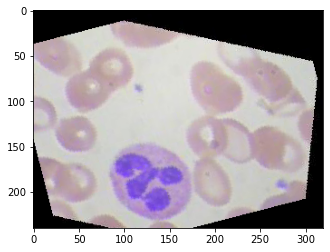

In [59]:
x = np.transpose(sm/2+0.5 ,(1,2,0))
plt.imshow(x)
train.classes[2]

In [60]:
x.shape

(240, 320, 3)

# Constructing the Convolution Network


In [61]:
import torch.nn as neural
import torch.functional as function
import torch

In [62]:
help(neural.Module)

Help on class Module in module torch.nn.modules.module:

class Module(builtins.object)
 |  Module() -> None
 |  
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super().__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  .. note::
 |      As per the example above, an ``__init__()`` call to the parent c

In [63]:
x.shape

(240, 320, 3)

In [64]:
class Neural(neural.Module):
    def __init__(self):                                               #Construction of Convolution Layers
       super(Neural,self).__init__()
       self.Conv1st = neural.Conv2d(in_channels=3,out_channels=16,kernel_size=(5,5),stride = 1,padding = 0)
       self.bn1 = neural.BatchNorm2d(16)
       self.maxpool1 = neural.MaxPool2d(kernel_size=(3,3),stride=1)
       self.Conv2nd = neural.Conv2d(in_channels=16,out_channels = 18,kernel_size = (3,3),stride=1,padding =0)
       self.maxpool2 = neural.MaxPool2d(kernel_size=(5,5),stride=1)
       self.bn2 = neural.BatchNorm2d(18)
       self.Conv3rd = neural.Conv2d(in_channels=18,out_channels = 8,kernel_size = (3,3),stride=1,padding=0)
       self.bn3 = neural.BatchNorm2d(8)
       self.maxpool3 = neural.MaxPool2d((3,3))
       self.Conv4th = neural.Conv2d(in_channels=8,out_channels = 4,kernel_size = (3,3),stride=1,padding=0)
       self.bn4 = neural.BatchNorm2d(4)
       self.maxpool4 = neural.MaxPool2d((2,2))
        #classifier functions
       self.fc1 = neural.Linear(7200,500)
       self.fc2 = neural.Linear(500,300)
       self.fc3 = neural.Linear(300,150)
       self.output = neural.Linear(150,len(test.classes))
       self.ReLU = neural.ReLU()
       self.flatten_ = neural.Flatten(1,-1)
    def forward(self,data):
        data_from_1st = self.maxpool1(self.ReLU(self.bn1(self.Conv1st(data))))
        data_from_2nd = self.maxpool2(self.ReLU(self.bn2(self.Conv2nd(data_from_1st))))
        data_from_3rd = self.maxpool3(self.ReLU(self.bn3(self.Conv3rd(data_from_2nd))))
        data_from_4th = self.maxpool4(self.ReLU(self.bn4(self.Conv4th(data_from_3rd))))
        
        #classifiying the data

        flattened_ip = self.flatten_(data_from_4th)  #flattening required
        op = self.ReLU(self.fc1(flattened_ip))
        op = self.ReLU(self.fc2(op))
        op = self.ReLU(self.fc3(op))
        
        output = self.output(op)
        return output

In [65]:
def weights_init(obj):
    class_name = obj.__class__.__name__
    if isinstance(class_name,neural.Linear):
       n = class_name.in_features
       range_end = (1/np.sqrt(n))
       obj.weight.data.normal(0,range_end)
       obj.bias.data.fill_(0)

 # Model Creation

In [66]:
My_model = Neural()

In [67]:
My_model.apply(weights_init)

Neural(
  (Conv1st): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
  (Conv2nd): Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(5, 5), stride=1, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (Conv3rd): Conv2d(18, 8, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
  (Conv4th): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (f

In [68]:
if torch.cuda.is_available():
    torch.cuda()

# Optimizing Function and Loss Function

In [69]:
from torch import optim

In [70]:
optimizer = optim.SGD(My_model.parameters(),lr = 0.1)
loss_fn = neural.CrossEntropyLoss()

In [71]:
gpu_available = torch.cuda.is_available()

# Training,Validating and Testing the Data

In [73]:
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(loader_train):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = My_model(images)
        loss = loss_fn(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()g b  
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/20], Loss: 1.3112
Epoch [2/20], Loss: 1.3164
Epoch [3/20], Loss: 1.2032
Epoch [4/20], Loss: 0.4470
Epoch [5/20], Loss: 0.2978
Epoch [6/20], Loss: 0.6114
Epoch [7/20], Loss: 0.8547
Epoch [8/20], Loss: 0.3665
Epoch [9/20], Loss: 0.5592
Epoch [10/20], Loss: 0.0762
Epoch [11/20], Loss: 0.3196
Epoch [12/20], Loss: 0.5378
Epoch [13/20], Loss: 0.3193
Epoch [14/20], Loss: 0.2986
Epoch [15/20], Loss: 0.1514
Epoch [16/20], Loss: 0.2130
Epoch [17/20], Loss: 0.3605
Epoch [18/20], Loss: 0.0008
Epoch [19/20], Loss: 0.0175
Epoch [20/20], Loss: 0.3295


In [74]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loader_train:
        images = images.to(device)
        labels = labels.to(device)
        outputs = My_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(random_train), 100 * correct / total))


Accuracy of the network on the 7468 train images: 87.35940010712373 %


In [75]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loader_valid:
        images = images.to(device)
        labels = labels.to(device)
        outputs = My_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} validation images: {} %'.format(len(random_valid), 100 * correct / total))

Accuracy of the network on the 2489 validation images: 86.54077942948976 %


In [76]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loader_test:
        images = images.to(device)
        labels = labels.to(device)
        outputs = My_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} test images: {} %'.format(len(random_test), 100 * correct / total))

Accuracy of the network on the 2487 test images: 75.6735022114998 %
